C:\Users\adama\AppData\Local\Temp\ipykernel_38496\4210484822.py:56: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-m * x) + b * np.exp(m * (x-n))
C:\Users\adama\AppData\Local\Temp\ipykernel_38496\4210484822.py:56: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-m * x) + b * np.exp(m * (x-n))
C:\Users\adama\AppData\Local\Temp\ipykernel_38496\4210484822.py:56: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-m * x) + b * np.exp(m * (x-n))
C:\Users\adama\AppData\Local\Temp\ipykernel_38496\4210484822.py:56: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-m * x) + b * np.exp(m * (x-n))
C:\Users\adama\AppData\Local\Temp\ipykernel_38496\4210484822.py:56: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-m * x) + b * np.exp(m * (x-n))
C:\Users\adama\AppData\Local\Temp\ipykernel_38496\4210484822.py:56: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-m * x) + b * np.exp(m * (x-n))
C:\Users\adama\A

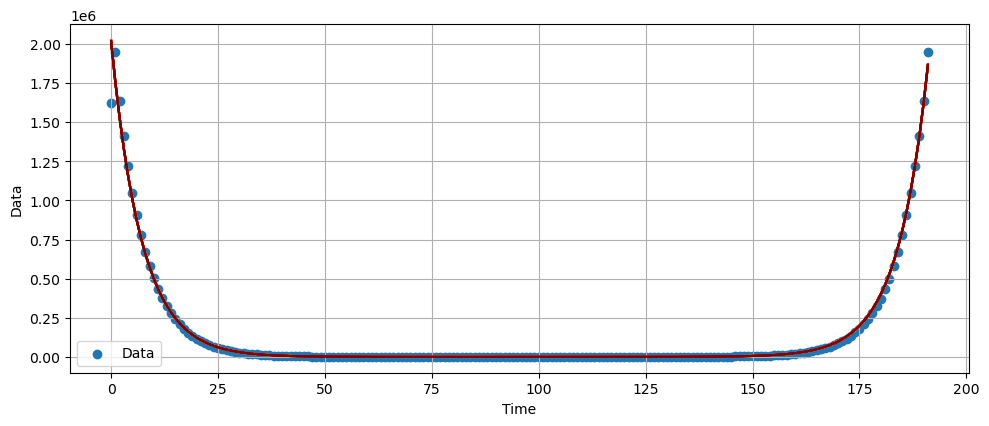

In [11]:
# Importing  necessary libraries
import numpy as np                 
import pandas as pd                
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit  

# Loading the data from the 'bootstrap_results_3.csv' file into a DataFrame
data = pd.read_csv('bootstrap_results_3.csv')
# Extract the first column (index 0) from the 'data' DataFrame as 'time'
time = data.iloc[:, 0]

max_time = time.max()
n = max_time

# Loading data from the '1.csv' file into another DataFrame
data2 = pd.read_csv('1.csv')
# Extracting the first column (index 0) from the 'data2' DataFrame as 'time2'
time2 = data2.iloc[:, 0]
# Extracting the second column (index 1) from the 'data2' DataFrame as 'data_values2'
data_values2 = data2.iloc[:, 1]

# Getting unique values from the 'time2' column
unique_times2 = np.unique(time2)
# For each unique time, computing the mean of 'data_values2' values corresponding to that time
data_mean2 = [np.mean(data_values2[time2 == t]) for t in unique_times2]

# Assigning the unique times to 'x2'
x2 = unique_times2
# Converting the computed means to a numpy array and assign to 'y2'
y2 = np.array(data_mean2)

# Creating a new figure with the specified size
plt.figure(figsize=(10, 8))

# Creating the first subplot in a 2-row, 1-column grid of plots
plt.subplot(2, 1, 1)
# Scatter plot of 'x2' and 'y2', with label 'Data'
plt.scatter(x2, y2, label='Data')

# Generating a collection of 50 colors using the 'jet' colormap
colors = plt.cm.jet(np.linspace(0, 1, 50))

# Looping through the columns 1 to 50 of the 'data' DataFrame
for i in range(1, 51):
    # Extracting the i-th column from 'data' as 'data_values'
    data_values = data.iloc[:, i]
    # For each unique time in 'time', computing the mean of 'data_values' corresponding to that time
    data_mean = [np.mean(data_values[time == t]) for t in np.unique(time)]
    # Getting unique times and assign to 'x'
    x = np.unique(time)
    # Converting the computed means to a numpy array and assign to 'y'
    y = np.array(data_mean)

    # Defining the model function with parameters m, a, and b
    def model_func(x, m, a, b):
        return a * np.exp(-m * x) + b * np.exp(m * (x-n))

    # Fitting the model to the data ('x' and 'y')
    params, _ = curve_fit(model_func, x, y)

    # Using the model function and the found parameters to predict the y-values for 'x'
    model_predictions = model_func(x, *params)

    # Plotting the model predictions using a color from the 'colors' list
    plt.plot(x, model_predictions, color=colors[i-1])


plt.xlabel('Time')
plt.ylabel('Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()